In [1]:
import pandas as pd
import altair as alt
import os

### 1. Load Titanic dataset

In [2]:
titanic_df = pd.read_csv("../data/titanic.csv")

In [3]:
titanic_df = titanic_df.fillna("None")
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,None,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,None,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,None,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328,None
1305,3,0,"Zabour, Miss. Thamine",female,None,1,0,2665,14.4542,None,C,None,None,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,None,C,None,None,None


### 2. Cabin coordinates

In [4]:
cabin_locations = {"A36": (350, 1.0), "A37": (350, 6.0), "A32": (400, 6.0), "A30": (400, 5.0), "A31": (400, 2.0), "A33": (400, 1.0), "A28": (405, 6.0), "A26": (405, 5.0), "A27": (405, 2.0),
                    "A29": (405, 1.0), "A34": (395, 6.0), "A35": (395, 1.0), "A24": (410, 6.0), "A22": (410, 5.0), "A23": (410, 2.0), "A25": (410, 1.0), "A20": (415, 6.0), "A18": (415, 5.0),
                    "A19": (415, 2.0), "A21": (415, 1.0), "A16": (420, 6.0), "A14": (420, 5.0), "A15": (420, 2.0), "A17": (420, 1.0), "A12": (425, 6.0), "A10": (425, 5.0), "A9":  (425, 2.0),
                    "A11": (425, 1.0), "A8": ( 430, 6.0),  "A6": (430, 5.0), "A5":  (430, 2.0), "A7":  (430, 1.0), "A4":  (435, 6.0), "A2":  (435, 4.0), "A1":  (435, 3.0), "A3":  (435, 1.0),
                       
                    "B90": (345, 6.0), "B94": (340, 6.0), "B96": (335, 6.0), "B98": (330, 6.0), "B92": (345, 5.0), "B91": (345, 1.0), "B101": (395, 3.0), "B102": (395, 4.0), "B100": (385, 4.0),
                    "B99": (385, 3.0), "B58": (400, 6.0), "B88": (350, 6.0), "B84": (355, 6.0), "B86": (355, 5.0), "B85": (355, 1.0), "B82": (360, 6.0), "B78": (365, 6.0), "B76": (370, 6.0),
                    "B72": (375, 6.0), "B70": (380, 6.0), "B66": (385, 6.0), "B64": (390, 6.0), "B60": (395, 6.0), "B80": (365, 5.0), "B74": (375, 5.0), "B68": (385, 5.0), "B62":  (395, 5.0),
                    "B79": (365, 1.0), "B73": (375, 1.0), "B67": (385, 1.0), "B52": (405, 5.0), "B51": (405, 1.0), "B61":  (395, 1.0),
                   
                    "C8": (465, 6.0), "C6": (465, 5.0), "C2": (465, 4.0), "C1": (465, 3.0), "C3": (465, 2.0), "C5": (465, 1.0), "C12": (460, 6.0), "C48": (460, 5.0), "C41": (460, 4.0),
                    "C43": (460, 3.0), "C9": (460, 2.0), "C11": (460, 1.0), "C14": (455, 6.0), "C50": (455, 4.0), "C15": (455, 1.0), "C18": (450, 6.0), "C16": (450, 5.0), "C52": (450, 4.0),
                    "C45": (450, 3.0), "C17": (450, 2.0), "C19": (450, 1.0), "C20": (445, 6.0), "C54": (445, 4.0), "C47": (445, 3.0), "C21": (445, 1.0), "C42": (440, 6.0), "C22": (440, 5.0),
                    "C56": (440, 4.0), "C49": (440, 3.0), "C23": (440, 2.0), "C25": (440, 1.0), "C26": (435, 6.0), "C58": (435, 4.0), "C51": (435, 3.0), "C27": (435, 1.0), "C30": (430, 6.0),
                    "C28": (430, 5.0), "C60": (430, 4.0), "C53": (430, 3.0), "C29": (430, 2.0), "C31": (430, 1.0), "C32": (425, 6.0), "C35": (425, 1.0), "C36": (420, 6.0), "C34": (420, 5.0),
                    "C35": (420, 2.0), "C37": (420, 1.0), "C39": (415, 6.0), "C38": (415, 1.0), "C42": (410, 6.0), "C40": (410, 5.0), "C46": (405, 6.0), "C44": (405, 5.0), "C62": (400, 6.0),
                    "C104": (400, 5.0), "C95": (400, 2.0), "C55": (400, 1.0), "C64": (395, 6.0), "C106": (395, 5.0), "C97": (395, 2.0), "C57": (395, 1.0), "C108": (390, 5.0), "C99": (390, 2.0),
                    "C66": (385, 6.0), "C110": (380, 5.0), "C101": (385, 2.0), "C59": (385, 1.0), "C68": (380, 6.0), "C112": (380, 5.0), "C103": (380, 2.0), "C61": (380, 1.0), "C105": (375, 2.0),
                    "C70": (370, 6.0), "C114": (370, 5.0), "107": (370, 2.0), "C63": (370, 1.0), "C72": (365, 6.0), "C116": (365, 5.0), "C118": (365, 4.0), "C111": (365, 3.0), "C109": (365, 2.0),
                    "C65": (365, 1.0), "C74": (360, 6.0), "C124": (360, 5.0), "C120": (360, 4.0), "C113": (360, 3.0), "C115": (360, 2.0), "C67": (360, 1.0), "C76": (355, 6.0), "C126": (355, 5.0),
                    "C69": (355, 1.0), "C78": (350, 6.0), "C128": (350, 5.0), "C117": (350, 2.0), "C71": (350, 1.0), "C80": (345, 6.0), "C130": (345, 5.0), "C119": (345, 2.0), "C73": (345, 1.0),
                    "C132": (340, 4.0), "C121": (340, 3.0), "C82": (335, 6.0), "C134": (335, 5.0), "C75": (335, 1.0), "C86": (330, 6.0), "C92": (330, 4.0), "C83": (330, 3.0),
                   
                    "D6": (465, 6.0), "D4": (465, 5.0), "D2": (465, 4.0), "D3": (465, 3.0), "D5": (465, 2.0), "D7": (465, 1.0), "D10": (460, 6.0), "D40": (460, 5.0), "D38": (460, 4.0),
                    "D39": (460, 3.0), "D9": (460, 2.0), "D11": (460, 1.0), "D16": (455, 6.0), "D14": (455, 5.0), "D15": (455, 2.0), "D17": (455, 1.0), "D20": (450, 6.0), "D18": (450, 5.0),
                    "D42": (450, 4.0), "D43": (450, 3.0), "D19": (450, 2.0), "D21": (450, 1.0), "D24": (445, 6.0), "D22": (445, 5.0), "D46": (445, 4.0), "D45": (445, 3.0), "D22": (445, 2.0),
                    "D25": (445, 1.0), "D28": (440, 6.0), "D26": (440, 5.0), "D48": (440, 4.0), "D47": (440, 3.0), "D27": (440, 2.0), "D29": (440, 1.0), "D32": (435, 6.0), "D30": (435, 5.0),
                    "D50": (435, 4.0), "D49": (435, 3.0), "D33": (435, 2.0), "D31": (435, 1.0), "D36": (430, 6.0), "D34": (430, 4.0), "D35": (430, 3.0), "D37": (430, 1.0), "D56": (360, 6.0),
                    "D135": (330, 4.0),
                       
                    "E200": (465, 4.0), "E201": (465, 3.0), "E1": (465, 2.0), "E2": (465, 1.0), "E202": (460, 4.0), "E203": (460, 3.0), "E3": (460, 2.0), "E4": (460, 1.0), "E11": (455, 3.0),
                    "E7": (455, 2.0), "E8": (455, 1.0), "E12": (450, 3.0), "E9": (450, 2.0), "E10": (450, 1.0), "E14": (445, 3.0), "E16": (445, 2.0), "E17": (445, 1.0), "E15": (440, 3.0),
                    "E18": (440, 2.0), "E19": (440, 1.0), "E20": (435, 2.0), "E21": (435, 1.0), "E22": (430, 2.0), "E23": (430, 1.0), "E26": (425, 3.0), "E24": (425, 2.0), "E25": (425, 1.0),
                    "E27": (420, 3.0), "E28": (420, 2.0), "E29": (420, 1.0), "E38": (415, 3.0), "E30": (415, 2.0), "E31": (415, 1.0), "E39": (410, 3.0), "E32": (410, 2.0), "E33": (410, 1.0),
                    "E40": (405, 3.0), "E34": (405, 2.0), "E35": (405, 1.0), "E41": (400, 3.0), "E36": (400, 2.0), "E37": (400, 1.0), "E42": (395, 3.0), "E43": (395, 2.0), "E44": (395, 1.0),
                    "E45": (390, 2.0), "E46": (390, 1.0), "E47": (385, 3.0), "E49": (385, 2.0), "E50": (385, 1.0), "E48": (380, 3.0), "E51": (380, 2.0), "E52": (380, 1.0), "E57": (375, 3.0),
                    "E53": (375, 2.0), "E54": (375, 1.0), "E58": (370, 3.0), "E55": (370, 2.0), "E56": (370, 1.0), "E60": (365, 3.0), "E64": (365, 2.0), "E65": (365, 1.0), "E62": (360, 3.0),
                    "E66": (360, 2.0), "E67": (360, 1.0), "E63": (355, 3.0), "E68": (355, 1.0), "E77": (345, 2.0), "E78": (345, 1.0), "E99": (330, 3.0), "E100": (330, 2.0), "E101": (330, 1.0),
                   
                    "F58": (465, 6.0), "F38": (465, 4.0), "F46": (465, 3.0), "F45": (465, 1.0), "F60": (460, 6.0), "F56": (460, 4.0), "F47": (460, 3.0), "F49": (460, 1.0), "F51": (455, 3.0),
                    "F53": (455, 1.0), "F62": (450, 6.0), "F55": (450, 3.0), "F57": (450, 2.0), "F59": (450, 1.0), "F68": (445, 6.0), "F66": (445, 5.0), "F64": (445, 4.0), "F69": (445, 3.0),
                    "F63": (445, 2.0), "F65": (445, 1.0), "F74": (440, 6.0), "F72": (440, 5.0), "F70": (440, 4.0), "F73": (440, 3.0), "F75": (440, 2.0), "F71": (440, 1.0), "F84": (435, 6.0),
                    "F82": (435, 5.0), "E80": (435, 4.0), "F77": (435, 3.0), "F79": (435, 2.0), "F81": (435, 1.0), "F90": (430, 6.0), "F88": (430, 5.0), "F86": (430, 4.0), "F83": (430, 3.0),
                    "F85": (430, 2.0), "F87": (430, 1.0), "F96": (425, 6.0), "F94": (425, 5.0), "F92": (425, 4.0), "F89": (425, 3.0), "F91": (425, 2.0), "F93": (425, 1.0), "F100": (420, 5.0),
                    "F98": (420, 4.0), "F95": (420, 3.0), "F97": (420, 2.0), "F99": (420, 1.0), "F4": (360, 6.0), "F2": (360, 5.0), "F5": (360, 2.0), "F7": (360, 1.0), "F8": (355, 6.0),
                    "F6": (355, 5.0), "F9": (355, 2.0), "F11": (355, 1.0), "F12": (350, 6.0), "F10": (350, 5.0), "F18": (345, 6.0), "F16": (345, 5.0), "F15": (345, 4.0), "F17": (345, 3.0),
                    "F19": (345, 2.0), "F21": (345, 1.0), "F28": (340, 6.0), "F26": (340, 5.0), "F24": (340, 4.0), "F29": (340, 3.0), "F25": (340, 2.0), "F27": (340, 1.0), "F34": (335, 6.0),
                    "F32": (335, 5.0), "F30": (335, 4.0), "F31": (335, 3.0), "F33": (335, 2.0), "F35": (335, 1.0), "F40": (330, 6.0), "F38": (330, 5.0), "F190": (330, 4.0), "F39": (330, 3.0),
                    "F41": (330, 2.0), "F43": (330, 1.0),
                   
                    "G8": (360, 6.0), "G6": (360, 5.0), "G2": (360, 4.0), "G5": (360, 3.0), "G3": (360, 2.0), "G1": (360, 1.0), "G16": (355, 6.0), "G14": (355, 5.0), "G12": (355, 4.0),
                    "G11": (355, 3.0), "G17": (355, 2.0), "G15": (355, 1.0), "G24": (350, 6.0), "G22": (350, 5.0), "G20": (350, 4.0), "G21": (350, 3.0), "G23": (350, 2.0), "G25": (350, 1.0),
                    "G30": (345, 6.0), "G28": (345, 5.0), "G26": (345, 4.0), "G29": (345, 3.0), "G31": (345, 2.0), "G33": (345, 1.0), "G36": (340, 6.0), "G34": (340, 5.0), "G32": (340, 4.0),
                    "G37": (340, 3.0), "G39": (340, 2.0), "G41": (340, 1.0), "G46": (335, 6.0), "G44": (335, 5.0), "G42": (335, 4.0), "G43": (335, 3.0), "G45": (335, 2.0), "G47": (335, 1.0),
                    "G48": (330, 3.0), "G49": (330, 4.0)
                  }

cabin_locations_df = pd.DataFrame(cabin_locations).T
cabin_locations_df.index.names = ["cabin"]
cabin_locations_df.columns = ["cabin_x", "cabin_y"]
cabin_locations_df

,cabin_x,cabin_y
cabin,,
A36,350.0,1.0
A37,350.0,6.0
A32,400.0,6.0
A30,400.0,5.0
A31,400.0,2.0
...,...,...
G43,335.0,3.0
G45,335.0,2.0
G47,335.0,1.0


In [5]:
os.getcwd()

'/Users/robertblumberg/Documents/MDS/DSCI_532/DSCI_532_GROUP_109/src'

#### 2.1 Mapping cabin coordinates to titanic data frame

In [6]:
titanic_df_with_cabin_coords = pd.merge(titanic_df, cabin_locations_df, left_on = "cabin", right_on = "cabin")
titanic_df_with_cabin_coords["deck"] = titanic_df_with_cabin_coords["cabin"].apply(lambda x: x[0])
titanic_passengers_by_cabin = titanic_df_with_cabin_coords.set_index(["cabin","name"]).sort_index()
titanic_passengers_by_cabin["survived"] = titanic_passengers_by_cabin["survived"].map({0:"Passenger Died", 1:"Passenger Survived"})
titanic_passengers_by_cabin
#titanic_passengers_by_cabin.to_csv("../data/wrangled_titanic_df.csv")

pclass  \
cabin name                                                         
A10   Ross, Mr. John Hugo                                      1   
A11   Rosenbaum, Miss. Edith Louise                            1   
A14   Clifford, Mr. George Quincy                              1   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...       1   
A18   Dulles, Mr. William Crothers                             1   
...                                                          ...   
G6    Sandstrom, Miss. Beatrice Irene                          3   
      Sandstrom, Miss. Marguerite Rut                          3   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...       3   
      Strom, Miss. Telma Matilda                               3   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)               3   

                                                                    survived  \
cabin name                                                                     
A10   Ross, Mr. John Hugo                                     Passenger Died   
A11   Rosenbaum, Miss. Edith Louise                       Passenger Survived   
A14   Clifford, Mr. George Quincy                             Passenger Died   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  Passenger Survived   
A18   Dulles, Mr. William Crothers                            Passenger Died   
...                                                                      ...   
G6    Sandstrom, Miss. Beatrice Irene                     Passenger Survived   
      Sandstrom, Miss. Marguerite Rut                     Passenger Survived   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  Passenger Survived   
      Strom, Miss. Telma Matilda                              Passenger Died   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              Passenger Died   

                                                             sex   age  sibsp  \
cabin name                                                                      
A10   Ross, Mr. John Hugo                                   male    36      0   
A11   Rosenbaum, Miss. Edith Louise                       female    33      0   
A14   Clifford, Mr. George Quincy                           male  None      0   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  female    48      1   
A18   Dulles, Mr. William Crothers                          male    39      0   
...                                                          ...   ...    ...   
G6    Sandstrom, Miss. Beatrice Irene                     female     1      1   
      Sandstrom, Miss. Marguerite Rut                     female     4      1   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  female    24      0   
      Strom, Miss. Telma Matilda                          female     2      0   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)          female    29      1   

                                                          parch    ticket  \
cabin name                                                                  
A10   Ross, Mr. John Hugo                                     0     13049   
A11   Rosenbaum, Miss. Edith Louise                           0  PC 17613   
A14   Clifford, Mr. George Quincy                             0    110465   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...      0     11755   
A18   Dulles, Mr. William Crothers                            0  PC 17580   
...                                                         ...       ...   
G6    Sandstrom, Miss. Beatrice Irene                         1   PP 9549   
      Sandstrom, Miss. Marguerite Rut                         1   PP 9549   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...      2   PP 9549   
      Strom, Miss. Telma Matilda                              1    347054   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              1    347054   

                                                             fare embarked  

#### 2.2 Separating coordinates for passengers in same cabin

In [7]:
for cabins in titanic_passengers_by_cabin.index.levels[0]:
    if titanic_passengers_by_cabin.loc[cabins].shape[0] > 1:
        i=0
        passengers = list(titanic_passengers_by_cabin.loc[cabins].index)
        for passenger in passengers:
            if i==0:
                shift_x = 1
                shift_y = 0.25
            if i==1:
                shift_x = -1
                shift_y = 0.25
            if i==2:
                shift_x = -1
                shift_y = -0.25
            if i==3:
                shift_x = 1
                shift_y = -0.25

            titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"]) + shift_x
            titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"]) + shift_y
            i+=1
            
titanic_passengers_by_cabin.reset_index("name")

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_x,cabin_y,deck
cabin,,,,,,,,,,,,,,,,
A10,"Ross, Mr. John Hugo",1,Passenger Died,male,36,0,0,13049,40.125,C,None,None,"Winnipeg, MB",425.0,5.00,A
A11,"Rosenbaum, Miss. Edith Louise",1,Passenger Survived,female,33,0,0,PC 17613,27.7208,C,11,None,"Paris, France",425.0,1.00,A
A14,"Clifford, Mr. George Quincy",1,Passenger Died,male,None,0,0,110465,52,S,None,None,"Stoughton, MA",420.0,5.00,A
A16,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,Passenger Survived,female,48,1,0,11755,39.6,C,1,None,London / Paris,420.0,6.00,A
A18,"Dulles, Mr. William Crothers",1,Passenger Died,male,39,0,0,PC 17580,29.7,C,None,133,"Philadelphia, PA",415.0,5.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G6,"Sandstrom, Miss. Beatrice Irene",3,Passenger Survived,female,1,1,1,PP 9549,16.7,S,13,None,None,361.0,5.25,G
G6,"Sandstrom, Miss. Marguerite Rut",3,Passenger Survived,female,4,1,1,PP 9549,16.7,S,13,None,None,359.0,5.25,G
G6,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",3,Passenger Survived,female,24,0,2,PP 9549,16.7,S,13,None,None,359.0,4.75,G


### 3. Ship plot

#### 3.1 Ship outline

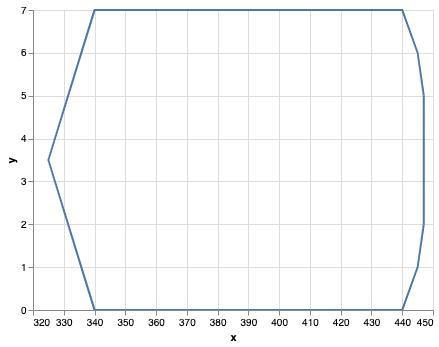

In [8]:
ship_outline_1 = pd.DataFrame({"x" : [325,340, 440, 445, 447], "y" : [3.5, 7, 7, 6, 5]})
ship_outline_2 = pd.DataFrame({"x" : [325,340, 440, 445, 447], "y" :  [3.5, 0, 0, 1, 2]})
ship_outline_3 = pd.DataFrame({"x" : [447,447], "y" :  [2, 5]})

chart_ship_outline_1 = alt.Chart(ship_outline_1).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline_2 = alt.Chart(ship_outline_2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline_3 = alt.Chart(ship_outline_3).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline = chart_ship_outline_1 + chart_ship_outline_2 + chart_ship_outline_3
chart_ship_outline

#### 3.2 Plotting cabins

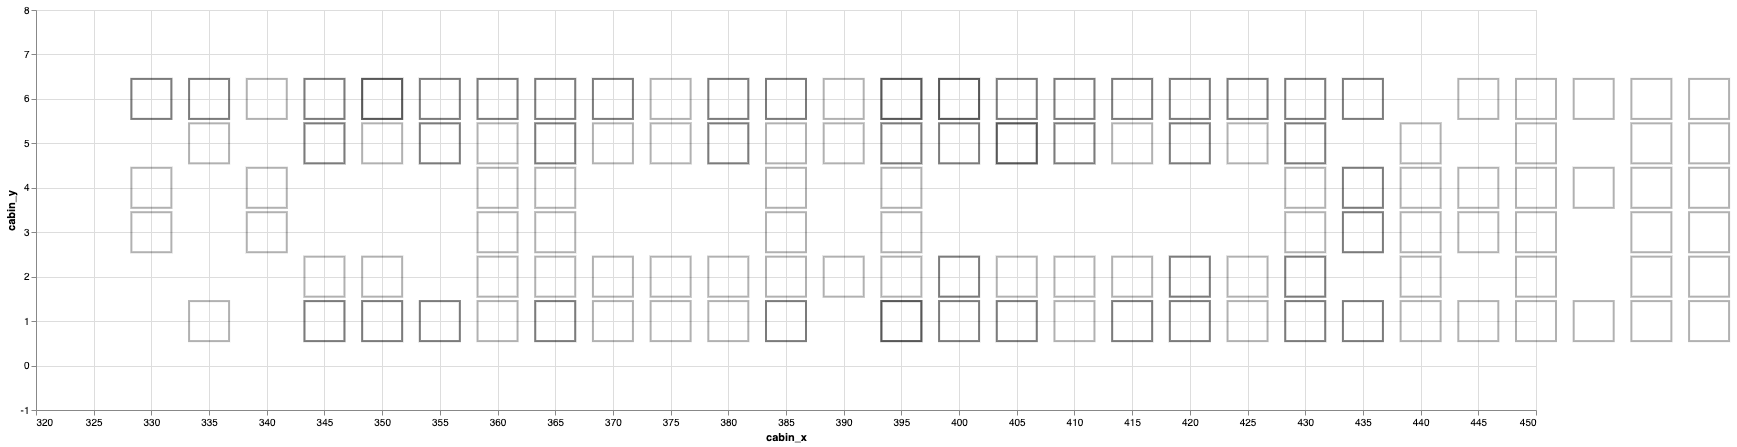

In [9]:
cabin_plot = alt.Chart(cabin_locations_df).mark_square(size = 1600, fill = "None", stroke = "black", opacity = 0.3).encode(
    alt.X('cabin_x:Q', scale=alt.Scale(domain = [320,450])),
    alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5]))
).properties(width = 1500, height = 400)
cabin_plot

#### 3.3 Plotting passengers

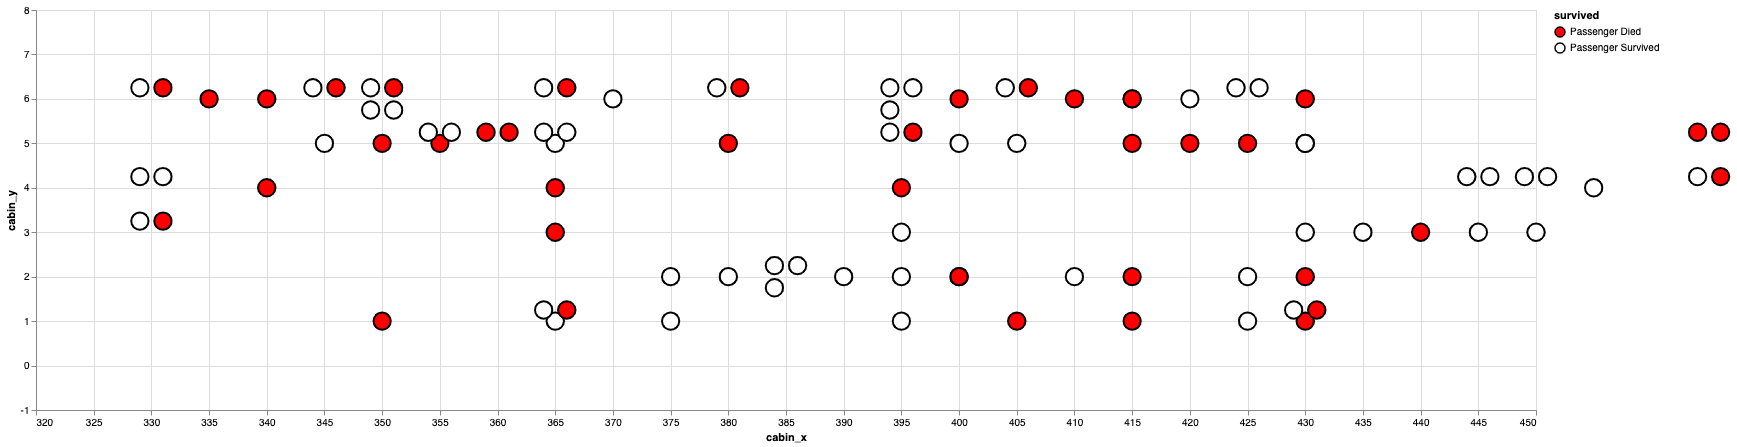

In [10]:
passenger_plot = alt.Chart(titanic_passengers_by_cabin.reset_index("name")).mark_point(size = 300, stroke = "black", filled = True, opacity = 1).encode(
    alt.X('cabin_x:Q', scale=alt.Scale(domain = [320,450])),
    alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5])),
    alt.Color('survived:N', scale=alt.Scale(range = ['red','white']))
).properties(width = 1500, height = 400)

passenger_plot

#### 3.4 Adding all plots together

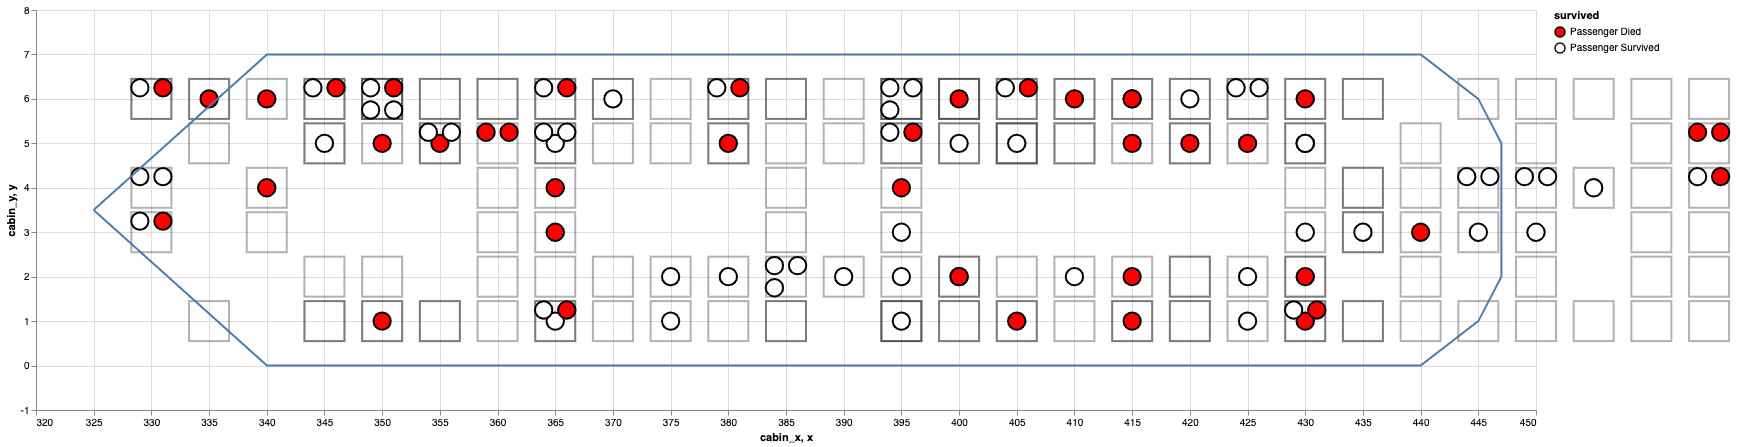

In [11]:
cabin_plot + passenger_plot + chart_ship_outline

## 4. Wrapping everything in the `make_titanic_plot` function

In [30]:
def make_titanic_plot(deck_level):
    titanic_df = pd.read_csv("../data/titanic.csv").fillna("None")
    
    cabin_locations = {"A36": (350, 1.0), "A37": (350, 6.0), "A32": (400, 6.0), "A30": (400, 5.0), "A31": (400, 2.0), "A33": (400, 1.0), "A28": (405, 6.0), "A26": (405, 5.0), "A27": (405, 2.0),
                    "A29": (405, 1.0), "A34": (395, 6.0), "A35": (395, 1.0), "A24": (410, 6.0), "A22": (410, 5.0), "A23": (410, 2.0), "A25": (410, 1.0), "A20": (415, 6.0), "A18": (415, 5.0),
                    "A19": (415, 2.0), "A21": (415, 1.0), "A16": (420, 6.0), "A14": (420, 5.0), "A15": (420, 2.0), "A17": (420, 1.0), "A12": (425, 6.0), "A10": (425, 5.0), "A9":  (425, 2.0),
                    "A11": (425, 1.0), "A8": ( 430, 6.0),  "A6": (430, 5.0), "A5":  (430, 2.0), "A7":  (430, 1.0), "A4":  (435, 6.0), "A2":  (435, 4.0), "A1":  (435, 3.0), "A3":  (435, 1.0),
                       
                    "B90": (345, 6.0), "B94": (340, 6.0), "B96": (335, 6.0), "B98": (330, 6.0), "B92": (345, 5.0), "B91": (345, 1.0), "B101": (395, 3.0), "B102": (395, 4.0), "B100": (385, 4.0),
                    "B99": (385, 3.0), "B58": (400, 6.0), "B88": (350, 6.0), "B84": (355, 6.0), "B86": (355, 5.0), "B85": (355, 1.0), "B82": (360, 6.0), "B78": (365, 6.0), "B76": (370, 6.0),
                    "B72": (375, 6.0), "B70": (380, 6.0), "B66": (385, 6.0), "B64": (390, 6.0), "B60": (395, 6.0), "B80": (365, 5.0), "B74": (375, 5.0), "B68": (385, 5.0), "B62":  (395, 5.0),
                    "B79": (365, 1.0), "B73": (375, 1.0), "B67": (385, 1.0), "B52": (405, 5.0), "B51": (405, 1.0), "B61":  (395, 1.0),
                   
                    "C8": (465, 6.0), "C6": (465, 5.0), "C2": (465, 4.0), "C1": (465, 3.0), "C3": (465, 2.0), "C5": (465, 1.0), "C12": (460, 6.0), "C48": (460, 5.0), "C41": (460, 4.0),
                    "C43": (460, 3.0), "C9": (460, 2.0), "C11": (460, 1.0), "C14": (455, 6.0), "C50": (455, 4.0), "C15": (455, 1.0), "C18": (450, 6.0), "C16": (450, 5.0), "C52": (450, 4.0),
                    "C45": (450, 3.0), "C17": (450, 2.0), "C19": (450, 1.0), "C20": (445, 6.0), "C54": (445, 4.0), "C47": (445, 3.0), "C21": (445, 1.0), "C42": (440, 6.0), "C22": (440, 5.0),
                    "C56": (440, 4.0), "C49": (440, 3.0), "C23": (440, 2.0), "C25": (440, 1.0), "C26": (435, 6.0), "C58": (435, 4.0), "C51": (435, 3.0), "C27": (435, 1.0), "C30": (430, 6.0),
                    "C28": (430, 5.0), "C60": (430, 4.0), "C53": (430, 3.0), "C29": (430, 2.0), "C31": (430, 1.0), "C32": (425, 6.0), "C35": (425, 1.0), "C36": (420, 6.0), "C34": (420, 5.0),
                    "C35": (420, 2.0), "C37": (420, 1.0), "C39": (415, 6.0), "C38": (415, 1.0), "C42": (410, 6.0), "C40": (410, 5.0), "C46": (405, 6.0), "C44": (405, 5.0), "C62": (400, 6.0),
                    "C104": (400, 5.0), "C95": (400, 2.0), "C55": (400, 1.0), "C64": (395, 6.0), "C106": (395, 5.0), "C97": (395, 2.0), "C57": (395, 1.0), "C108": (390, 5.0), "C99": (390, 2.0),
                    "C66": (385, 6.0), "C110": (380, 5.0), "C101": (385, 2.0), "C59": (385, 1.0), "C68": (380, 6.0), "C112": (380, 5.0), "C103": (380, 2.0), "C61": (380, 1.0), "C105": (375, 2.0),
                    "C70": (370, 6.0), "C114": (370, 5.0), "107": (370, 2.0), "C63": (370, 1.0), "C72": (365, 6.0), "C116": (365, 5.0), "C118": (365, 4.0), "C111": (365, 3.0), "C109": (365, 2.0),
                    "C65": (365, 1.0), "C74": (360, 6.0), "C124": (360, 5.0), "C120": (360, 4.0), "C113": (360, 3.0), "C115": (360, 2.0), "C67": (360, 1.0), "C76": (355, 6.0), "C126": (355, 5.0),
                    "C69": (355, 1.0), "C78": (350, 6.0), "C128": (350, 5.0), "C117": (350, 2.0), "C71": (350, 1.0), "C80": (345, 6.0), "C130": (345, 5.0), "C119": (345, 2.0), "C73": (345, 1.0),
                    "C132": (340, 4.0), "C121": (340, 3.0), "C82": (335, 6.0), "C134": (335, 5.0), "C75": (335, 1.0), "C86": (330, 6.0), "C92": (330, 4.0), "C83": (330, 3.0),
                   
                    "D6": (465, 6.0), "D4": (465, 5.0), "D2": (465, 4.0), "D3": (465, 3.0), "D5": (465, 2.0), "D7": (465, 1.0), "D10": (460, 6.0), "D40": (460, 5.0), "D38": (460, 4.0),
                    "D39": (460, 3.0), "D9": (460, 2.0), "D11": (460, 1.0), "D16": (455, 6.0), "D14": (455, 5.0), "D15": (455, 2.0), "D17": (455, 1.0), "D20": (450, 6.0), "D18": (450, 5.0),
                    "D42": (450, 4.0), "D43": (450, 3.0), "D19": (450, 2.0), "D21": (450, 1.0), "D24": (445, 6.0), "D22": (445, 5.0), "D46": (445, 4.0), "D45": (445, 3.0), "D22": (445, 2.0),
                    "D25": (445, 1.0), "D28": (440, 6.0), "D26": (440, 5.0), "D48": (440, 4.0), "D47": (440, 3.0), "D27": (440, 2.0), "D29": (440, 1.0), "D32": (435, 6.0), "D30": (435, 5.0),
                    "D50": (435, 4.0), "D49": (435, 3.0), "D33": (435, 2.0), "D31": (435, 1.0), "D36": (430, 6.0), "D34": (430, 4.0), "D35": (430, 3.0), "D37": (430, 1.0), "D56": (360, 6.0),
                    "D135": (330, 4.0),
                       
                    "E200": (465, 4.0), "E201": (465, 3.0), "E1": (465, 2.0), "E2": (465, 1.0), "E202": (460, 4.0), "E203": (460, 3.0), "E3": (460, 2.0), "E4": (460, 1.0), "E11": (455, 3.0),
                    "E7": (455, 2.0), "E8": (455, 1.0), "E12": (450, 3.0), "E9": (450, 2.0), "E10": (450, 1.0), "E14": (445, 3.0), "E16": (445, 2.0), "E17": (445, 1.0), "E15": (440, 3.0),
                    "E18": (440, 2.0), "E19": (440, 1.0), "E20": (435, 2.0), "E21": (435, 1.0), "E22": (430, 2.0), "E23": (430, 1.0), "E26": (425, 3.0), "E24": (425, 2.0), "E25": (425, 1.0),
                    "E27": (420, 3.0), "E28": (420, 2.0), "E29": (420, 1.0), "E38": (415, 3.0), "E30": (415, 2.0), "E31": (415, 1.0), "E39": (410, 3.0), "E32": (410, 2.0), "E33": (410, 1.0),
                    "E40": (405, 3.0), "E34": (405, 2.0), "E35": (405, 1.0), "E41": (400, 3.0), "E36": (400, 2.0), "E37": (400, 1.0), "E42": (395, 3.0), "E43": (395, 2.0), "E44": (395, 1.0),
                    "E45": (390, 2.0), "E46": (390, 1.0), "E47": (385, 3.0), "E49": (385, 2.0), "E50": (385, 1.0), "E48": (380, 3.0), "E51": (380, 2.0), "E52": (380, 1.0), "E57": (375, 3.0),
                    "E53": (375, 2.0), "E54": (375, 1.0), "E58": (370, 3.0), "E55": (370, 2.0), "E56": (370, 1.0), "E60": (365, 3.0), "E64": (365, 2.0), "E65": (365, 1.0), "E62": (360, 3.0),
                    "E66": (360, 2.0), "E67": (360, 1.0), "E63": (355, 3.0), "E68": (355, 1.0), "E77": (345, 2.0), "E78": (345, 1.0), "E99": (330, 3.0), "E100": (330, 2.0), "E101": (330, 1.0),
                   
                    "F58": (465, 6.0), "F38": (465, 4.0), "F46": (465, 3.0), "F45": (465, 1.0), "F60": (460, 6.0), "F56": (460, 4.0), "F47": (460, 3.0), "F49": (460, 1.0), "F51": (455, 3.0),
                    "F53": (455, 1.0), "F62": (450, 6.0), "F55": (450, 3.0), "F57": (450, 2.0), "F59": (450, 1.0), "F68": (445, 6.0), "F66": (445, 5.0), "F64": (445, 4.0), "F69": (445, 3.0),
                    "F63": (445, 2.0), "F65": (445, 1.0), "F74": (440, 6.0), "F72": (440, 5.0), "F70": (440, 4.0), "F73": (440, 3.0), "F75": (440, 2.0), "F71": (440, 1.0), "F84": (435, 6.0),
                    "F82": (435, 5.0), "E80": (435, 4.0), "F77": (435, 3.0), "F79": (435, 2.0), "F81": (435, 1.0), "F90": (430, 6.0), "F88": (430, 5.0), "F86": (430, 4.0), "F83": (430, 3.0),
                    "F85": (430, 2.0), "F87": (430, 1.0), "F96": (425, 6.0), "F94": (425, 5.0), "F92": (425, 4.0), "F89": (425, 3.0), "F91": (425, 2.0), "F93": (425, 1.0), "F100": (420, 5.0),
                    "F98": (420, 4.0), "F95": (420, 3.0), "F97": (420, 2.0), "F99": (420, 1.0), "F4": (360, 6.0), "F2": (360, 5.0), "F5": (360, 2.0), "F7": (360, 1.0), "F8": (355, 6.0),
                    "F6": (355, 5.0), "F9": (355, 2.0), "F11": (355, 1.0), "F12": (350, 6.0), "F10": (350, 5.0), "F18": (345, 6.0), "F16": (345, 5.0), "F15": (345, 4.0), "F17": (345, 3.0),
                    "F19": (345, 2.0), "F21": (345, 1.0), "F28": (340, 6.0), "F26": (340, 5.0), "F24": (340, 4.0), "F29": (340, 3.0), "F25": (340, 2.0), "F27": (340, 1.0), "F34": (335, 6.0),
                    "F32": (335, 5.0), "F30": (335, 4.0), "F31": (335, 3.0), "F33": (335, 2.0), "F35": (335, 1.0), "F40": (330, 6.0), "F38": (330, 5.0), "F190": (330, 4.0), "F39": (330, 3.0),
                    "F41": (330, 2.0), "F43": (330, 1.0),
                   
                    "G8": (360, 6.0), "G6": (360, 5.0), "G2": (360, 4.0), "G5": (360, 3.0), "G3": (360, 2.0), "G1": (360, 1.0), "G16": (355, 6.0), "G14": (355, 5.0), "G12": (355, 4.0),
                    "G11": (355, 3.0), "G17": (355, 2.0), "G15": (355, 1.0), "G24": (350, 6.0), "G22": (350, 5.0), "G20": (350, 4.0), "G21": (350, 3.0), "G23": (350, 2.0), "G25": (350, 1.0),
                    "G30": (345, 6.0), "G28": (345, 5.0), "G26": (345, 4.0), "G29": (345, 3.0), "G31": (345, 2.0), "G33": (345, 1.0), "G36": (340, 6.0), "G34": (340, 5.0), "G32": (340, 4.0),
                    "G37": (340, 3.0), "G39": (340, 2.0), "G41": (340, 1.0), "G46": (335, 6.0), "G44": (335, 5.0), "G42": (335, 4.0), "G43": (335, 3.0), "G45": (335, 2.0), "G47": (335, 1.0),
                    "G48": (330, 3.0), "G49": (330, 4.0)
                  }
                       

    cabin_locations_df = pd.DataFrame(cabin_locations).T.reset_index()
    cabin_locations_df["deck"] = cabin_locations_df["index"].apply(lambda x: x[0])
    cabin_locations_df = cabin_locations_df.set_index(["deck", "index"])
    cabin_locations_df.index.names = ["deck", "cabin"]
    cabin_locations_df.columns = ["cabin_x", "cabin_y"]
    
    titanic_df_with_cabin_coords = pd.merge(titanic_df, cabin_locations_df, left_on = "cabin", right_on = "cabin")
    titanic_df_with_cabin_coords["deck"] = titanic_df_with_cabin_coords["cabin"].apply(lambda x: x[0])
    titanic_passengers_by_cabin = titanic_df_with_cabin_coords.set_index(["cabin","name"]).sort_index()
    
    for cabins in titanic_passengers_by_cabin.index.levels[0]:
        if titanic_passengers_by_cabin.loc[cabins].shape[0] > 1:
            i=0
            passengers = list(titanic_passengers_by_cabin.loc[cabins].index)
            for passenger in passengers:
                if i==0:
                    shift_x = 1
                    shift_y = 0.25
                if i==1:
                    shift_x = -1
                    shift_y = 0.25
                if i==2:
                    shift_x = -1
                    shift_y = -0.25
                if i==3:
                    shift_x = 1
                    shift_y = -0.25

                titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"]) + shift_x
                titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"]) + shift_y
                i+=1
    
    ship_outline_1 = pd.DataFrame({"x" : [305, 325, 470, 475, 477], "y" : [3.5, 7, 7, 6, 5]})
    ship_outline_2 = pd.DataFrame({"x" : [305, 325, 470, 475, 477], "y" :  [3.5, 0, 0, 1, 2]})
    ship_outline_3 = pd.DataFrame({"x" : [477,477], "y" :  [2, 5]})

    chart_ship_outline_1 = alt.Chart(ship_outline_1).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline_2 = alt.Chart(ship_outline_2).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline_3 = alt.Chart(ship_outline_3).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline = chart_ship_outline_1 + chart_ship_outline_2 + chart_ship_outline_3
    
    cabin_plot = alt.Chart(cabin_locations_df.loc[deck_level]).mark_square(size = 1400, fill = "None", stroke = "black", opacity = 0.3).encode(
        alt.X('cabin_x:Q', title = "", scale=alt.Scale(domain = [300,450])),
        alt.Y('cabin_y:Q', title = "", scale=alt.Scale(domain = [-1,7.5]))
    ).properties(width = 1500, height = 400)
    titanic_passengers_by_cabin = titanic_passengers_by_cabin.reset_index().set_index(["deck","cabin"])
    titanic_passengers_by_cabin["survived"] = titanic_passengers_by_cabin["survived"].map({0:"Passenger Died", 1:"Passenger Survived"})

    passenger_plot = alt.Chart(titanic_passengers_by_cabin.loc[deck_level].reset_index()).mark_point(size = 250, stroke = "black", filled = True, opacity = 1).encode(
        alt.X('cabin_x:Q', scale=alt.Scale(domain = [300,450])),
        alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5])),
        alt.Color('survived:N', scale=alt.Scale(range = ['red','white']), legend = alt.Legend(titleFontSize = 0, labelFontSize = 17)),
        tooltip=['name:N', 'sex:N', 'age:O', 'cabin:N']
    ).properties(width = 1500, height = 400, title = "Fate of titanic passengers by cabin location on deck {}".format(deck_level))
    
    full_plot = (cabin_plot + passenger_plot + chart_ship_outline
                ).configure_title(fontSize = 20
                ).configure_legend(orient='bottom')
    
    return full_plot

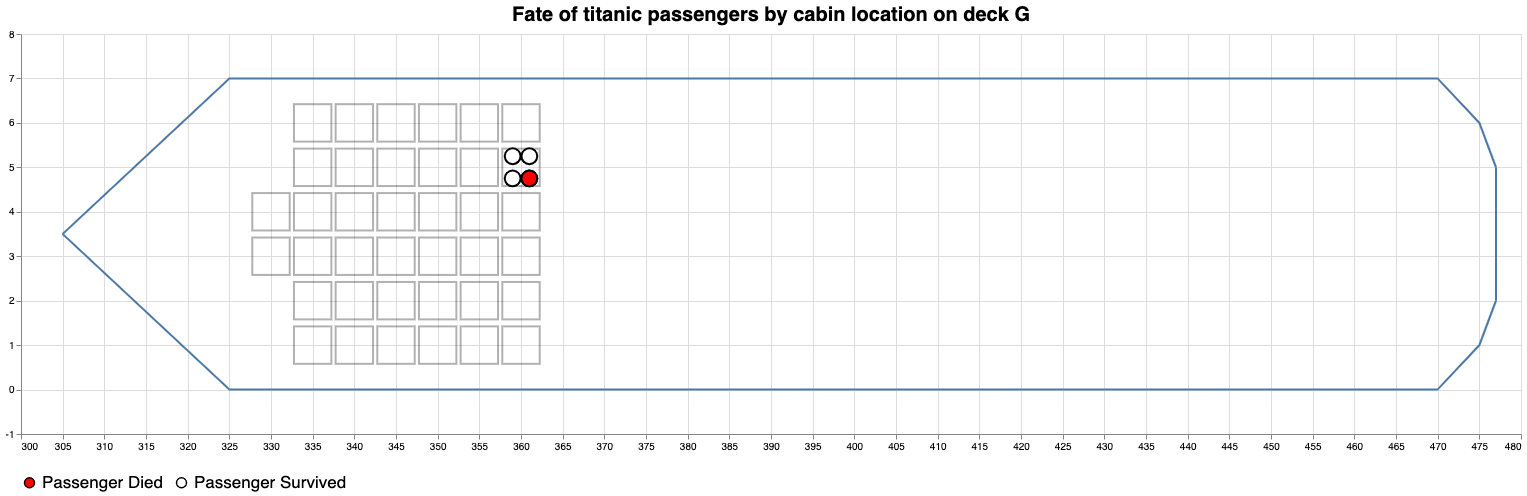

In [34]:
make_titanic_plot("G")

In [9]:
from make_plot import make_titanic_plot

In [12]:
make_titanic_plot("A").set_index(["cabin","name"])

pclass  \
cabin name                                                         
A10   Ross, Mr. John Hugo                                      1   
A11   Rosenbaum, Miss. Edith Louise                            1   
A14   Clifford, Mr. George Quincy                              1   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...       1   
A18   Dulles, Mr. William Crothers                             1   
...                                                          ...   
G6    Sandstrom, Miss. Beatrice Irene                          3   
      Sandstrom, Miss. Marguerite Rut                          3   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...       3   
      Strom, Miss. Telma Matilda                               3   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)               3   

                                                                    survived  \
cabin name                                                                     
A10   Ross, Mr. John Hugo                                     Passenger Died   
A11   Rosenbaum, Miss. Edith Louise                       Passenger Survived   
A14   Clifford, Mr. George Quincy                             Passenger Died   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  Passenger Survived   
A18   Dulles, Mr. William Crothers                            Passenger Died   
...                                                                      ...   
G6    Sandstrom, Miss. Beatrice Irene                     Passenger Survived   
      Sandstrom, Miss. Marguerite Rut                     Passenger Survived   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  Passenger Survived   
      Strom, Miss. Telma Matilda                              Passenger Died   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              Passenger Died   

                                                             sex   age  sibsp  \
cabin name                                                                      
A10   Ross, Mr. John Hugo                                   male  36.0      0   
A11   Rosenbaum, Miss. Edith Louise                       female  33.0      0   
A14   Clifford, Mr. George Quincy                           male  None      0   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  female  48.0      1   
A18   Dulles, Mr. William Crothers                          male  39.0      0   
...                                                          ...   ...    ...   
G6    Sandstrom, Miss. Beatrice Irene                     female   1.0      1   
      Sandstrom, Miss. Marguerite Rut                     female   4.0      1   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  female  24.0      0   
      Strom, Miss. Telma Matilda                          female   2.0      0   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)          female  29.0      1   

                                                          parch    ticket  \
cabin name                                                                  
A10   Ross, Mr. John Hugo                                     0     13049   
A11   Rosenbaum, Miss. Edith Louise                           0  PC 17613   
A14   Clifford, Mr. George Quincy                             0    110465   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...      0     11755   
A18   Dulles, Mr. William Crothers                            0  PC 17580   
...                                                         ...       ...   
G6    Sandstrom, Miss. Beatrice Irene                         1   PP 9549   
      Sandstrom, Miss. Marguerite Rut                         1   PP 9549   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...      2   PP 9549   
      Strom, Miss. Telma Matilda                              1    347054   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              1    347054   

                                                             fare embarked  

In [11]:
titanic_passengers_by_cabin

pclass  \
cabin name                                                         
A10   Ross, Mr. John Hugo                                      1   
A11   Rosenbaum, Miss. Edith Louise                            1   
A14   Clifford, Mr. George Quincy                              1   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...       1   
A18   Dulles, Mr. William Crothers                             1   
...                                                          ...   
G6    Sandstrom, Miss. Beatrice Irene                          3   
      Sandstrom, Miss. Marguerite Rut                          3   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...       3   
      Strom, Miss. Telma Matilda                               3   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)               3   

                                                                    survived  \
cabin name                                                                     
A10   Ross, Mr. John Hugo                                     Passenger Died   
A11   Rosenbaum, Miss. Edith Louise                       Passenger Survived   
A14   Clifford, Mr. George Quincy                             Passenger Died   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  Passenger Survived   
A18   Dulles, Mr. William Crothers                            Passenger Died   
...                                                                      ...   
G6    Sandstrom, Miss. Beatrice Irene                     Passenger Survived   
      Sandstrom, Miss. Marguerite Rut                     Passenger Survived   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  Passenger Survived   
      Strom, Miss. Telma Matilda                              Passenger Died   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              Passenger Died   

                                                             sex   age  sibsp  \
cabin name                                                                      
A10   Ross, Mr. John Hugo                                   male    36      0   
A11   Rosenbaum, Miss. Edith Louise                       female    33      0   
A14   Clifford, Mr. George Quincy                           male  None      0   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...  female    48      1   
A18   Dulles, Mr. William Crothers                          male    39      0   
...                                                          ...   ...    ...   
G6    Sandstrom, Miss. Beatrice Irene                     female     1      1   
      Sandstrom, Miss. Marguerite Rut                     female     4      1   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...  female    24      0   
      Strom, Miss. Telma Matilda                          female     2      0   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)          female    29      1   

                                                          parch    ticket  \
cabin name                                                                  
A10   Ross, Mr. John Hugo                                     0     13049   
A11   Rosenbaum, Miss. Edith Louise                           0  PC 17613   
A14   Clifford, Mr. George Quincy                             0    110465   
A16   Duff Gordon, Lady. (Lucille Christiana Sutherla...      0     11755   
A18   Dulles, Mr. William Crothers                            0  PC 17580   
...                                                         ...       ...   
G6    Sandstrom, Miss. Beatrice Irene                         1   PP 9549   
      Sandstrom, Miss. Marguerite Rut                         1   PP 9549   
      Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengts...      2   PP 9549   
      Strom, Miss. Telma Matilda                              1    347054   
      Strom, Mrs. Wilhelm (Elna Matilda Persson)              1    347054   

                                                             fare embarked  